# Data Preprocessing

In [1]:
import numpy as np, cv2, os, tensorflow as tf, pandas as pd

In [2]:
image_size = 125

In [3]:
classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

Training Set

In [4]:
path = os.path.join(os.path.dirname(os.getcwd()), 'Datasets\Face Mask Dataset\Train')

categories = os.listdir(path)
labels = [i for i in range(len(categories))]
label = dict(zip(categories, labels))

In [5]:
print(label)

{'WithMask': 0, 'WithoutMask': 1}


In [6]:
images_train = list()
target_train = list()

for category in categories:
    folder_path = os.path.join(path, category)
    imgs = os.listdir(folder_path)
    for img in imgs:
        img_path = os.path.join(folder_path, img)
        i = cv2.imread(img_path)                         
        i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)                # Converting images to grayscale
        i = cv2.resize(i, (image_size, image_size))
        images_train.append(i)
        target_train.append(label[category])

In [7]:
images_train = np.array(images_train) / 255
images_train = np.reshape(images_train, (len(images_train), image_size, image_size, 1))   # Resizing the array to a 4-D array to match the input of the neural network
target_train = np.array(target_train)

In [8]:
print(images_train.shape)

(10000, 125, 125, 1)


Test Set

In [9]:
path = os.path.join(os.path.dirname(os.getcwd()), 'Datasets\Face Mask Dataset\Test')

images_test = list()
target_test = list()

for category in categories:
    folder_path = os.path.join(path, category)
    imgs = os.listdir(folder_path)
    for img in imgs:
        img_path = os.path.join(folder_path, img)
        i = cv2.imread(img_path)
        i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        i = cv2.resize(i, (image_size, image_size))
        images_test.append(i)
        target_test.append(label[category])

images_test = np.array(images_test) / 255
images_test = np.reshape(images_test, (len(images_test), image_size, image_size, 1))   # Resizing the array to a 4-D array to match the input of the neural network
target_test = np.array(target_test)

In [10]:
print(images_test.shape)

(992, 125, 125, 1)


Validation Set

In [11]:
path = os.path.join(os.path.dirname(os.getcwd()), 'Datasets\Face Mask Dataset\Validation')

images_validation = list()
target_validation = list()

for category in categories:
    folder_path = os.path.join(path, category)
    imgs = os.listdir(folder_path)
    for img in imgs:
        img_path = os.path.join(folder_path, img)
        i = cv2.imread(img_path)             
        i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)                                     
        i = cv2.resize(i, (image_size, image_size))
        images_validation.append(i)
        target_validation.append(label[category])

images_validation = np.array(images_validation) / 255
images_validation = np.reshape(images_validation, (len(images_validation), image_size, image_size, 1))   # Resizing the array to a 4-D array to match the input of the neural network
target_validation = np.array(target_validation)

In [12]:
print(images_validation.shape)

(800, 125, 125, 1)


In [13]:
from keras.utils import np_utils
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
target_validation = np_utils.to_categorical(target_validation)

# Convolutional Neural Network Architecture

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [15]:
model = Sequential()

# First CNN Layer
model.add(Conv2D(filters = 200, kernel_size = (4, 4), activation = 'relu', input_shape = (image_size, image_size, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second CNN Layer
model.add(Conv2D(filters = 100, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))

# Dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

# Final layer with 2 neurons corresponding to the two categories
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 200)     3400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 84100)             0         
_________________________________________________________________
dropout (Dropout)            (None, 84100)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                4

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience=5, restore_best_weights=True)

In [18]:
history = model.fit(images_train, target_train, epochs = 25, validation_data = (images_validation, target_validation), 
          callbacks = [early_stop], batch_size = 32)

Epoch 1/25
313/313 [==============================] - 119s 325ms/step - loss: 0.5631 - accuracy: 0.7375 - val_loss: 0.3036 - val_accuracy: 0.9613
Epoch 2/25
313/313 [==============================] - 95s 305ms/step - loss: 0.2774 - accuracy: 0.9584 - val_loss: 0.2080 - val_accuracy: 0.9688
Epoch 3/25
313/313 [==============================] - 96s 308ms/step - loss: 0.1993 - accuracy: 0.9723 - val_loss: 0.1771 - val_accuracy: 0.9613
Epoch 4/25
313/313 [==============================] - 96s 306ms/step - loss: 0.1428 - accuracy: 0.9798 - val_loss: 0.1557 - val_accuracy: 0.9638
Epoch 5/25
313/313 [==============================] - 96s 308ms/step - loss: 0.1197 - accuracy: 0.9811 - val_loss: 0.1248 - val_accuracy: 0.9650
Epoch 6/25
313/313 [==============================] - 96s 306ms/step - loss: 0.0864 - accuracy: 0.9882 - val_loss: 0.1137 - val_accuracy: 0.9725
Epoch 7/25
313/313 [==============================] - 96s 306ms/step - loss: 0.0699 - accuracy: 0.9871 - val_loss: 0.1051 - val_a

In [19]:
model.evaluate(images_test, target_test)

31/31 [==============================] - 3s 107ms/step - loss: 0.0845 - accuracy: 0.9768


[0.08446254581212997, 0.9768145084381104]

<AxesSubplot:>

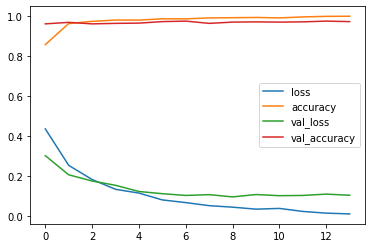

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
model.save('mask_detection_model.h5')

# Face Mask Detection

In [22]:
from keras.models import load_model
model = load_model('mask_detection_model.h5')

In [23]:
label_inv = {v: k for k, v in label.items()}
print(label_inv)

{0: 'WithMask', 1: 'WithoutMask'}


In [24]:
video_source = cv2.VideoCapture(0)
color = {0: (0, 165, 255), 1: (0, 0, 255), 2: (0, 255, 0)}                 # BGR format
#              Orange             Red            Green

In [25]:
while True:
    ret, frame = video_source.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray_frame,scaleFactor = 1.1, minNeighbors = 5, minSize = (100, 100))
    
    for (x, y, w, h) in faces:
        
        img = gray_frame[y: y+h, x: x+w]
        img = cv2.resize(img, (image_size, image_size))
        img = np.array(img) / 255
        img = np.reshape(img, (1, image_size, image_size, 1))
        prediction = model.predict(img)
        result = np.argmax(prediction, axis = 1)[0]
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), color[result], 2)
        cv2.rectangle(frame, (x, y-40), (x+w, y), color[result], -1)
        cv2.putText(img = frame, text = label_inv[result], org = (x, y-10), fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale = 0.8, color = (255, 255, 255), thickness = 2)

    cv2.imshow('Live from webcam 1', frame)
    key = cv2.waitKey(1)
    if key == 27:
        break
        
cv2.destroyAllWindows()
video_source.release()

# Test Image

In [26]:
test_image = cv2.imread('face-mask-test.jpg')
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
faces = classifier.detectMultiScale(test_image_gray,scaleFactor = 1.1, minNeighbors = 5, minSize = (100, 100))

for (x, y, w, h) in faces:

    img = test_image_gray[y: y+h, x: x+w]
    img = cv2.resize(img, (image_size, image_size))
    img = np.array(img) / 255
    img = np.reshape(img, (1, image_size, image_size, 1))
    prediction = model.predict(img)
    result = np.argmax(prediction, axis = 1)[0]

    cv2.rectangle(test_image, (x, y), (x+w, y+h), color[result], 2)
    cv2.rectangle(test_image, (x, y-40), (x+w, y), color[result], -1)
    cv2.putText(img = test_image, text = label_inv[result], org = (x, y-10), fontFace = cv2.FONT_HERSHEY_SIMPLEX, 
            fontScale = 0.8, color = (255, 255, 255), thickness = 2)

while True:
    cv2.imshow('Test Image', test_image)
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()